                                Date  Unemployment_Rate  Estimated Employed  \
count                            740         740.000000        7.400000e+02   
mean   2019-12-12 18:36:58.378378496          11.787946        7.204460e+06   
min              2019-05-31 00:00:00           0.000000        4.942000e+04   
25%              2019-08-31 00:00:00           4.657500        1.190404e+06   
50%              2019-11-30 00:00:00           8.350000        4.744178e+06   
75%              2020-03-31 00:00:00          15.887500        1.127549e+07   
max              2020-06-30 00:00:00          76.740000        4.577751e+07   
std                              NaN          10.721298        8.087988e+06   

       Estimated Labour Participation Rate (%)  
count                               740.000000  
mean                                 42.630122  
min                                  13.330000  
25%                                  38.062500  
50%                                  41.160

C:\Users\Keval savaliya\AppData\Local\Temp\ipykernel_11104\1219451951.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Date', y='Unemployment_Rate', ci=None)


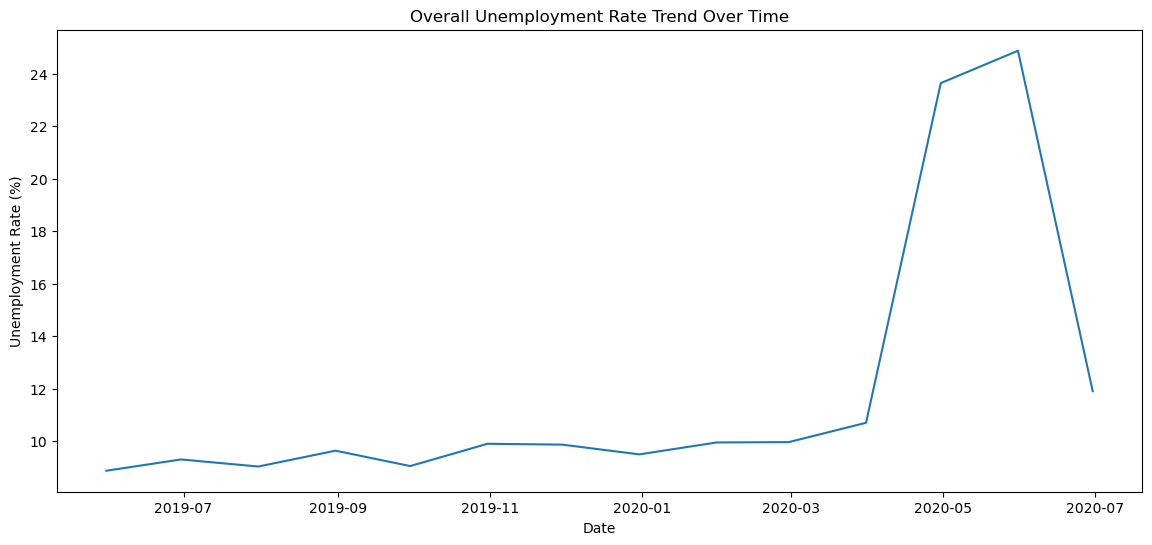

C:\Users\Keval savaliya\AppData\Local\Temp\ipykernel_11104\1219451951.py:39: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(pre_covid['Unemployment_Rate'], label='Pre-Covid', shade=True)
C:\Users\Keval savaliya\AppData\Local\Temp\ipykernel_11104\1219451951.py:40: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(post_covid['Unemployment_Rate'], label='Post-Covid', shade=True)


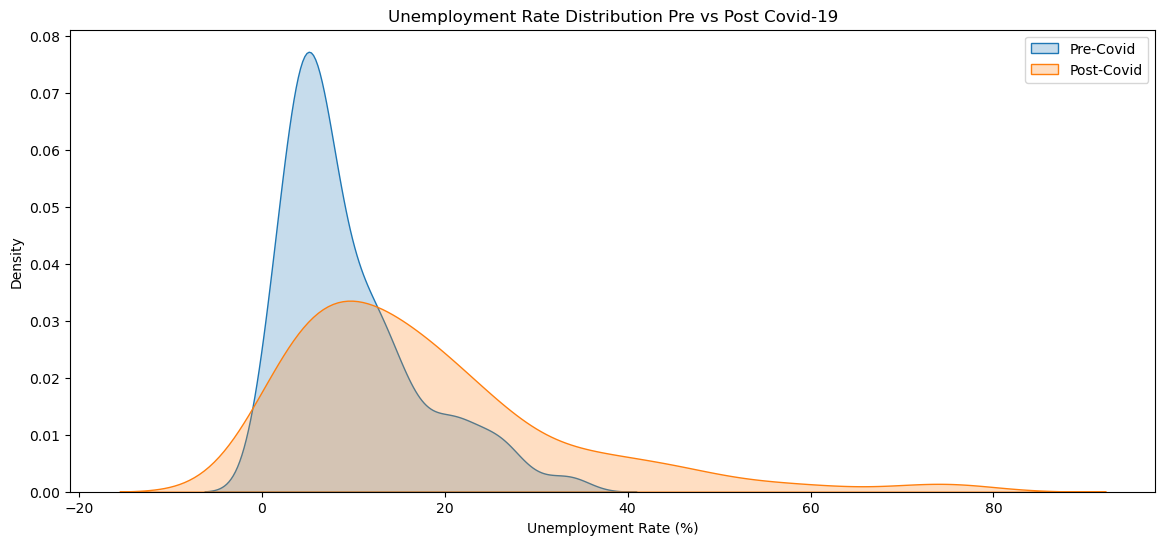

C:\Users\Keval savaliya\AppData\Local\Temp\ipykernel_11104\1219451951.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_avg.index, y=monthly_avg.values, palette='viridis')


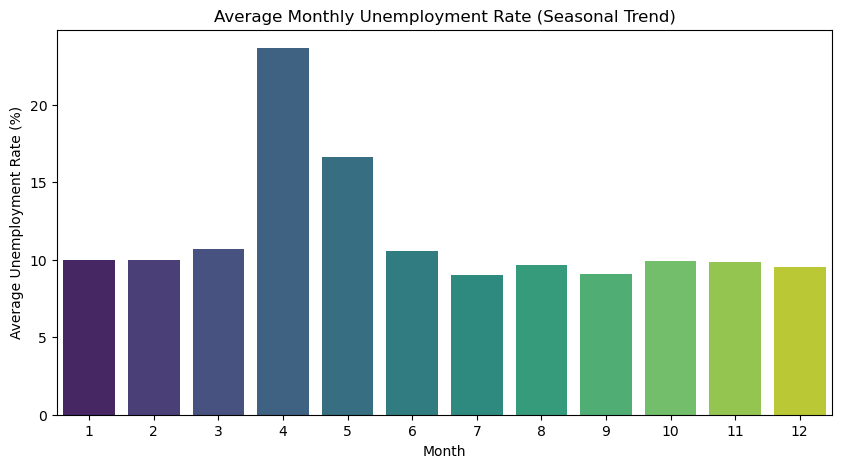

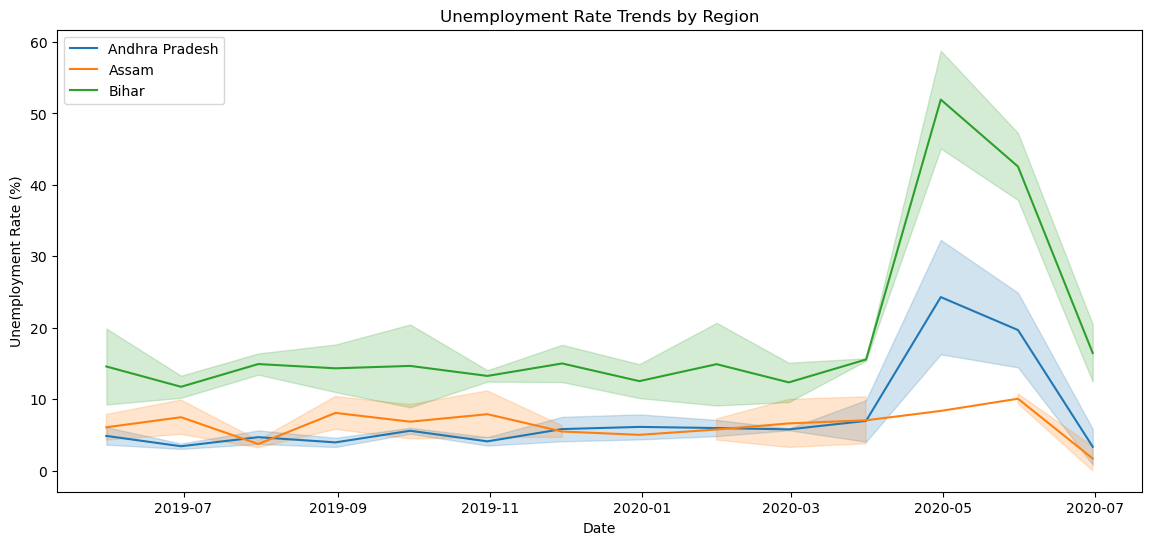

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset (update path as needed)
df = pd.read_csv(r'C:\Users\Keval savaliya\Downloads\Unemployment in India (1).csv')

# Step 2: Clean column names and rename for convenience
df.columns = df.columns.str.strip()
df.rename(columns={
    'Date': 'Date',
    'Estimated Unemployment Rate (%)': 'Unemployment_Rate'
}, inplace=True)

# Step 3: Convert 'Date' to datetime format (day first)
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

# Step 4: Drop rows with missing values in key columns
df = df.dropna(subset=['Date', 'Unemployment_Rate'])

# Step 5: Basic exploration
print(df.describe())
print(df['Region'].value_counts())  # See unemployment data distribution by Region

# Step 6: Plot overall unemployment rate trend
plt.figure(figsize=(14,6))
sns.lineplot(data=df, x='Date', y='Unemployment_Rate', ci=None)
plt.title('Overall Unemployment Rate Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.show()

# Step 7: Covid-19 Impact Analysis
# Define pre-covid and post-covid periods (assuming covid impact started ~March 2020)
pre_covid = df[df['Date'] < '2020-03-01']
post_covid = df[df['Date'] >= '2020-03-01']

plt.figure(figsize=(14,6))
sns.kdeplot(pre_covid['Unemployment_Rate'], label='Pre-Covid', shade=True)
sns.kdeplot(post_covid['Unemployment_Rate'], label='Post-Covid', shade=True)
plt.title('Unemployment Rate Distribution Pre vs Post Covid-19')
plt.xlabel('Unemployment Rate (%)')
plt.legend()
plt.show()

# Step 8: Seasonal Trends (monthly averages)
df['Month'] = df['Date'].dt.month
monthly_avg = df.groupby('Month')['Unemployment_Rate'].mean()

plt.figure(figsize=(10,5))
sns.barplot(x=monthly_avg.index, y=monthly_avg.values, palette='viridis')
plt.title('Average Monthly Unemployment Rate (Seasonal Trend)')
plt.xlabel('Month')
plt.ylabel('Average Unemployment Rate (%)')
plt.show()

# Step 9: Regional trends example (choose a few regions)
regions_to_plot = df['Region'].unique()[:3]  # pick first 3 regions for example

plt.figure(figsize=(14,6))
for region in regions_to_plot:
    sns.lineplot(data=df[df['Region'] == region], x='Date', y='Unemployment_Rate', label=region)
plt.title('Unemployment Rate Trends by Region')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.show()
